## Project Description

#### There are two players, A and B. At the beginning of the game, each starts with 4 coins, and there are 2 coins in the pot. A goes first,then B, then A,. . . . During a particular player's turn, the player tosses a 6-sided die. If the player rolls a:  

####  1, then the player does nothing.  
####  2: then the player takes all coins in the pot. 
####  3: then the player takes half of the coins in the pot (rounded down). 
####  4,5,6: then the player puts a coin in the pot. 

####  A player loses (and the game is over) if they are unable to perform the task (i.e., if they have 0 coins and need to place one in the pot). We define a cycle as A and then B completing their turns. The exception is if a player goes out; that is the final cycle (but it still counts as the last cycle). 

####  We are trying to determine the expected number (and maybe even the distribution) of cycles the game will last for. I'm guessing that you can use "first-step" analysis to get the expected value. Simulation seems the easiest thing to do to get the entire distribution.

In [1]:
import random
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def roll_die():
    
    '''
    This function returns the outcome of a roll of a 6-sided die
    ''' 
    roll = random.randint(1,6) 
    
    return roll

def play_turn(player,coins):
    
    '''
    This function performs a player's turn in the game. The player rolls a 6-sided die. Below are the actions of the outcome.
    1 : Player does nothing. Next player's turn for the game starts
    2 : Player takes all coins from pot. If pot is empty, player loses and game is over. If not, coins are updated and game switches to next Player.
    3 : Player takes 1/2 coins from pot (rounded down). If pot is empty or has only 1 coin, player loses and game is over. If not, coins are updated and game switches to next Player.
    4,5,6 : Player puts a coin in the pot. If player does not have coins, he loses and game is over. If not, coins are updated and game switches to next player.
    '''
    
    roll = roll_die()
    
    # Rolling 1
    if roll == 1:
        # Switch game to next Player
        return 'next',player,roll
    
    # Rolling 4,5,6
    elif roll in (4,5,6):
        if not coins[player]:
            # Player loses and game is over.
            return 'over',player,roll
        
        else:
            # Player adds a coin to the pot.
            coins['pot'] += 1
            coins[player] -= 1
            return 'next',player,roll
    
    # Rolling 2
    elif roll == 2:
        if not coins['pot']:
            # Player loses and game is over.
            return 'over',player,roll
        
        else:
            # Player takes all coins from pot
            coins[player] += coins['pot']
            coins['pot'] = 0
            return 'next',player,roll
    
    # Rolling 3
    else:
        # Player takes 1/2 coins from pot
        coins[player] += coins['pot']//2
        coins['pot'] -= coins['pot']//2
        return 'next',player,roll
        

In [5]:
def main():
    # Main program routine

    # Initializing coins for Players A, B and pot
    players = {0:'A', 1:'B'}
    coins = {'A':4, 'B':4, 'pot':2}

    # Initializing cycle. A cycle is defined as either player completing their turn. Player A starts the game.
    game_cycle = 0
    turn = cycle(range(2))

    #print("Before Game start State ", coins)

    while True:    
        result,player,roll = play_turn(players[next(turn)], coins)

        # Add a cycle every time player 'A' plays a turn
        if player == 'A':
            game_cycle += 1

        #print("Current Cycle", game_cycle)
        #print("Player: ", player, "Roll: ",roll)
        #print(coins)
        #print("")
        #print(result)

        if result == 'over':
            #print("Cycle: ", game_cycle, " Player: ", player, "Lost")
            break
    return game_cycle

In [6]:
# Simulating 10000 runs and getting the number of cylcles for each run
result = [main() for i in range(100000)]

In [7]:
expected_cycles = np.mean(result)

In [8]:
expected_cycles

8.89965

(array([8.22791667e-02, 3.89083333e-02, 1.22736111e-02, 3.64861111e-03,
        1.24166667e-03, 3.79166667e-04, 1.09722222e-04, 3.61111111e-05,
        8.33333333e-06, 4.16666667e-06]),
 array([ 1. ,  8.2, 15.4, 22.6, 29.8, 37. , 44.2, 51.4, 58.6, 65.8, 73. ]),
 <a list of 10 Patch objects>)

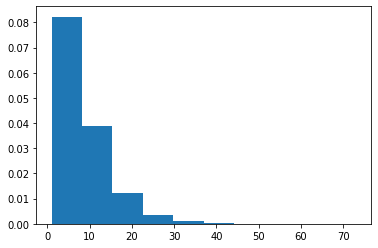

In [9]:
plt.hist(result, density=True)

In [11]:
## Testing for normality

from scipy.stats import shapiro, normaltest

stat,p = shapiro(random.sample(result, 50))
stat2,p2 = normaltest(random.sample(result,50))

print("p-value of statstical normality test: ",p)
if p < 0.05:
    print("Shapiro-Wilk Normality test: Distribution is not Gaussian")
else:
    print("Shapiro-Wilk Normality : Distribution is Gaussian")
    
if p2 < 0.05:
    print("D’Agostino’s K^2 test: Distribution is not Gaussian")
else:
    print("D’Agostino’s K^2 test: Distribution is Gaussian")

p-value of statstical normality test:  6.452164580394992e-09
Shapiro-Wilk Normality test: Distribution is not Gaussian
D’Agostino’s K^2 test: Distribution is not Gaussian


(array([0.06423554, 0.15126585, 0.14697727, 0.40012032, 0.61816224,
        0.53185446, 0.29036517, 0.10255312, 0.02372706, 0.00149168]),
 array([0.        , 0.42904594, 0.85809189, 1.28713783, 1.71618378,
        2.14522972, 2.57427566, 3.00332161, 3.43236755, 3.8614135 ,
        4.29045944]),
 <a list of 10 Patch objects>)

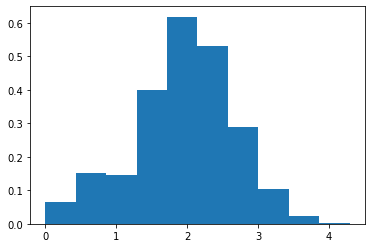

In [12]:
## Performing Log transformation to see if normality is seen
import math

result2 = [math.log(i) for i in result]
plt.hist(result2, density=True)

In [13]:
## Testing for normality

from scipy.stats import shapiro, normaltest

stat,p = shapiro(random.sample(result2, 50))
stat2,p2 = normaltest(random.sample(result2,50))

print("p-value of statstical normality test: ",p)
if p < 0.05:
    print("Shapiro-Wilk Normality test: Distribution is not Gaussian")
else:
    print("Shapiro-Wilk Normality : Distribution is Gaussian")
    
if p2 < 0.05:
    print("D’Agostino’s K^2 test: Distribution is not Gaussian")
else:
    print("D’Agostino’s K^2 test: Distribution is Gaussian")

p-value of statstical normality test:  0.16289569437503815
Shapiro-Wilk Normality : Distribution is Gaussian
D’Agostino’s K^2 test: Distribution is Gaussian
